In [14]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp
import datetime
import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
def getAllFinished(mypath):
    cols = ['ID',
            'category',
            'checkIns',
            'createdAt',
            'description',
            'genCategory',
            'lat','lon',
            'name',
            'photoCount',
            'price',
            'query','rating',
            'tags','tileID',
            'time','tips',
            'users','verified']
    
    files = [ f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath,f)) and ('.csv' in f)) ]
#     print files
    return {k.replace('.csv',''):pd.read_csv(os.path.join(mypath,k))[cols] for k in files}

In [16]:
dfs = getAllFinished('/Users/casy/Dropbox/CUSP/project/Square_cities/data/finished_data/')

In [17]:
def convertDT(df):
    df['createdAt'] = pd.to_datetime(df['createdAt'], yearfirst=1,errors='coerce')
    return df


In [18]:
for k in dfs:
    dfs[k] =convertDT(dfs[k])

In [19]:
def plotCumTS(df, ax, name):
    x = df[['createdAt','ID']].set_index('createdAt').resample('1M', how='count').cumsum().rename(columns={'ID':name})
    x = x/x.max()
    x.plot( ax=ax)

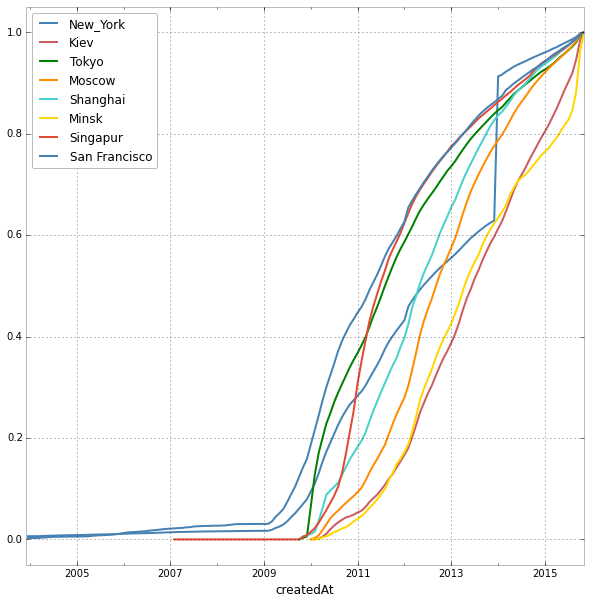

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, df in dfs.iteritems():
    plotCumTS(df,ax, name)
plt.savefig('img/Timeline_Comparison.png')

In [21]:
gl = [ u'College & University',
 u'Food',
 u'Residence',
 u'Travel & Transport',
 u'Shop & Service',
 u'Arts & Entertainment',
 u'Nightlife Spot',
 u'Outdoors & Recreation',
 u'Professional & Other Places',
 u'Event']

In [22]:
def catCumTS(df,name):
    df2 = df[['genCategory','createdAt']].set_index('createdAt')

    for cat in gl:
        df2[cat]= df2['genCategory'].apply(lambda x: int(x==cat))
    
    df2 = df2[gl]
    df2 = df2.resample('1M', how='sum').cumsum()
    df2 = df2.cumsum(axis=1)
    
    ## just to have same top-down sequense in legend
    cols = df2.columns.tolist() 
    cols.reverse()

    df2 = df2[cols]

    return df2.plot(figsize=(10,10),title='Timeline of venue creation, %s' % name)

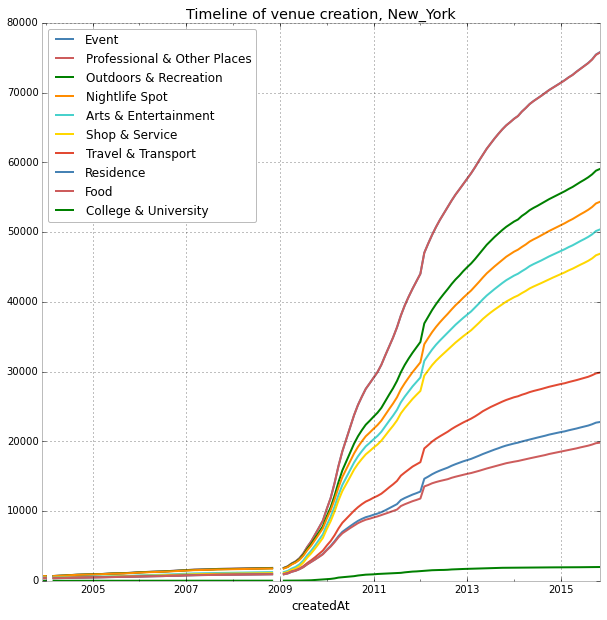

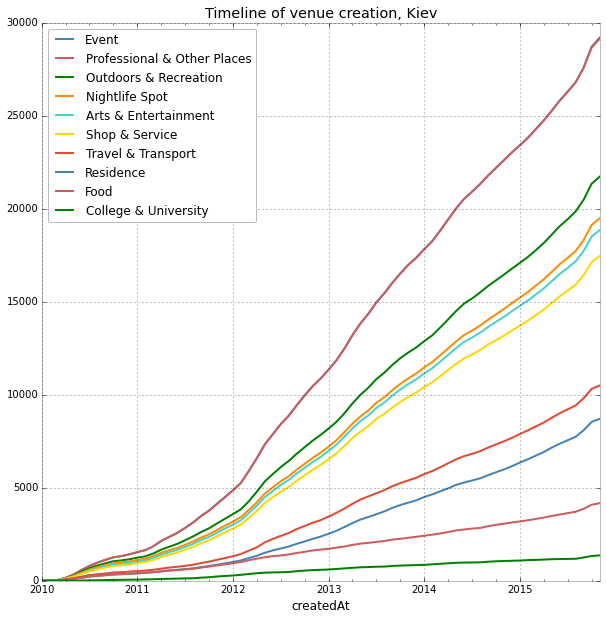

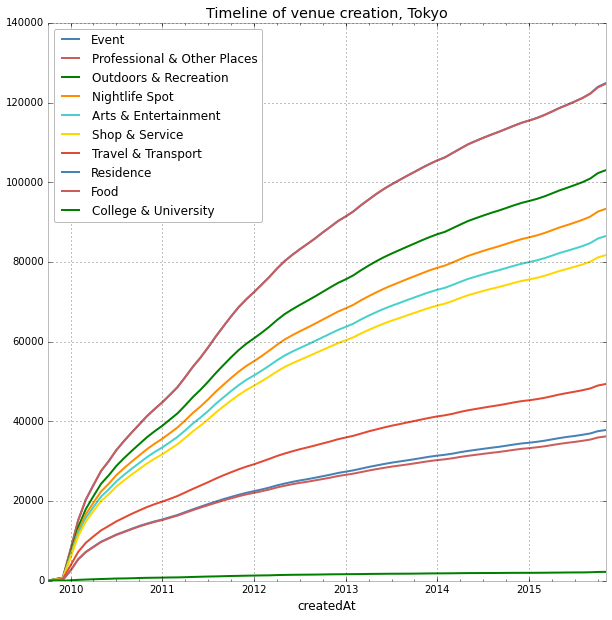

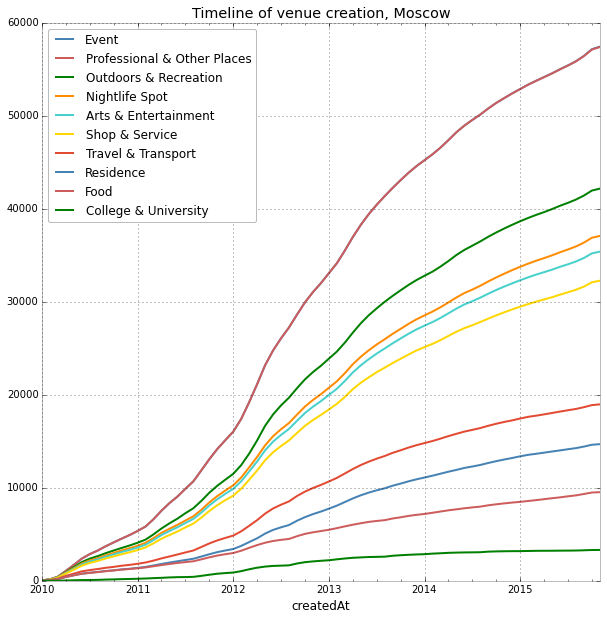

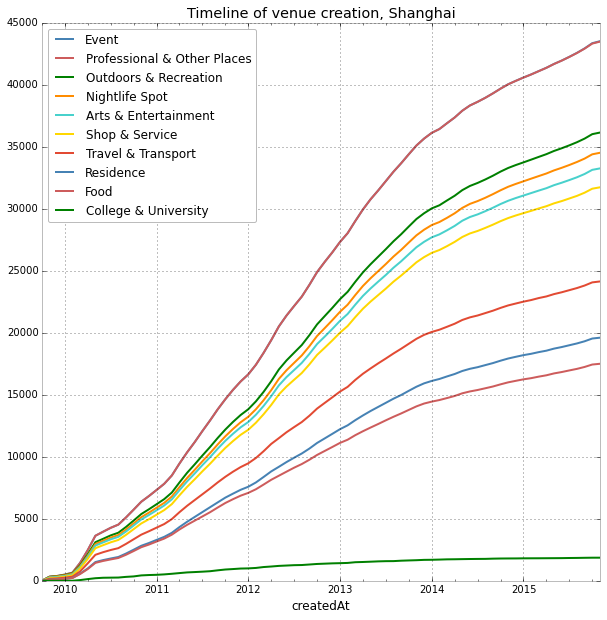

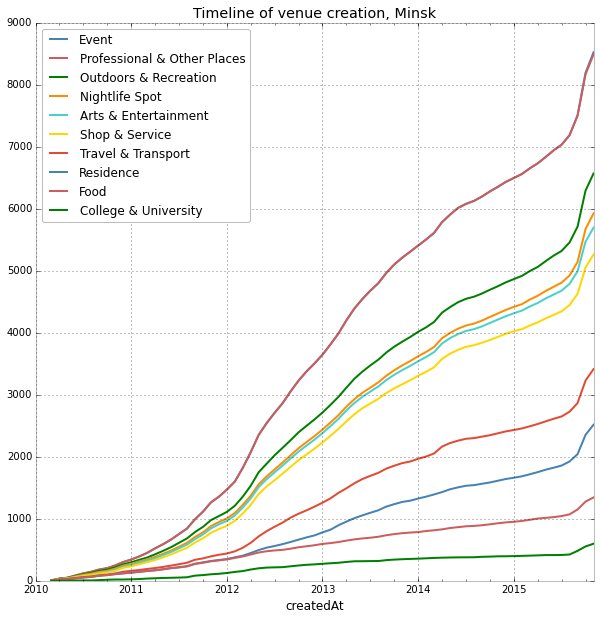

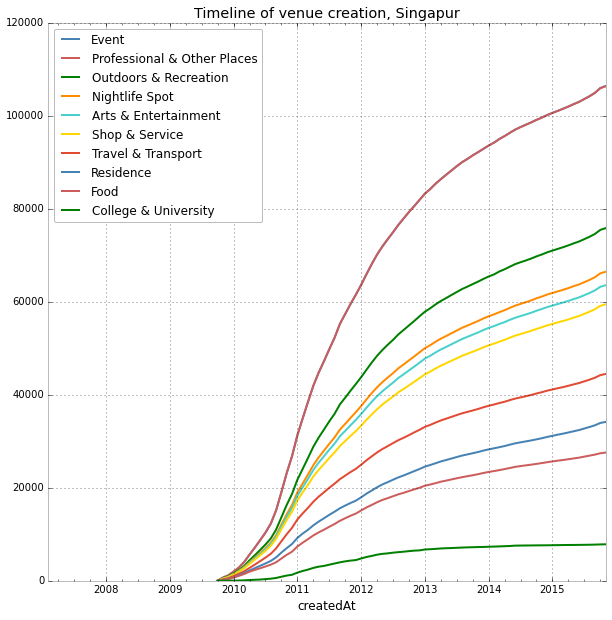

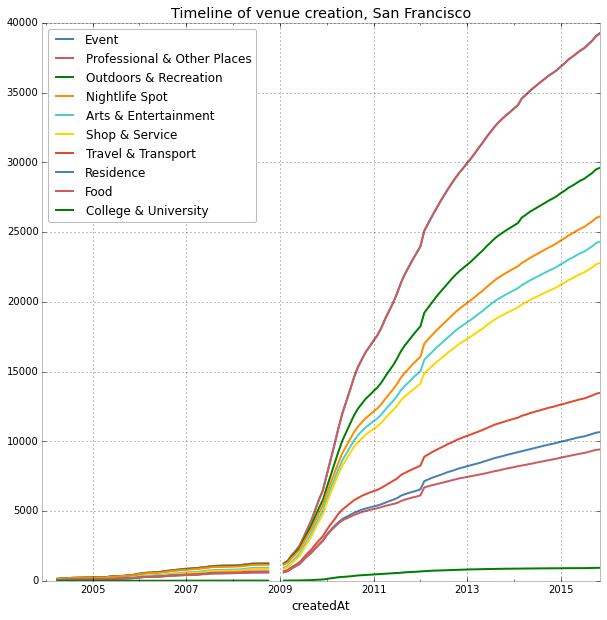

In [23]:
# p = catCumTS(tokyo, 'Tokyo')
# plt.savefig('Timeline_Tokyo.png')
for k, v in dfs.iteritems():
    p = catCumTS(v, k)
    plt.savefig('img/Timeline_%s.png' %k)